___
# import packages
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt

___
# Class **ChessBoard** Declaration
___

In [2]:
class ChessBoard:
    white = [1,1,1]
    blue = [0,0,1]
    red = [1,0,0]
    def __init__(self):
        self.grid = np.zeros([8,8,3])
        for i in range(8):
            for j in range(8):
                if (i%2==0 and j%2==0) or (i%2==1 and j%2==1):
                    self.grid[i,j] = ChessBoard.white
    
    def add_red(self, row, column):
        self.grid[row,column] = ChessBoard.red

    def add_blue(self, row, column):
        self.grid[row,column] = ChessBoard.blue

    def render(self):
        plt.imshow(self.grid)

    def check_if_under_attack(self,red_x,red_y,blue_x,blue_y):
        if red_x == blue_x or red_y == blue_y or abs(red_x - blue_x) == abs(red_y - blue_y):
            return True
        return False

    def is_under_attack(self):
        red_list = []
        blue_list = []
        for i in range(8):
            for j in range(8):
                if (np.all(self.grid[i,j] == ChessBoard.red)):
                    red_list.append(tuple((i,j)))
                elif (np.all(self.grid[i,j] == ChessBoard.blue)):
                    blue_list.append(tuple((i,j)))
        for red in red_list:
            for blue in blue_list:
                if self.check_if_under_attack(red[0], red[1], blue[0], blue[1]) == True:
                    return True
        return False               

___
# Visual Example
___

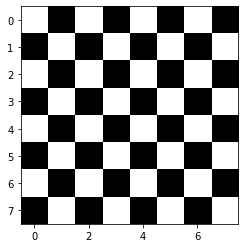

In [3]:
board = ChessBoard()
board.render()

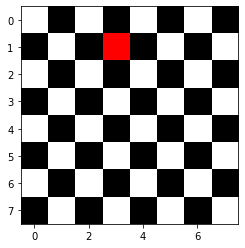

In [4]:
board.add_red(1,3)
board.render()

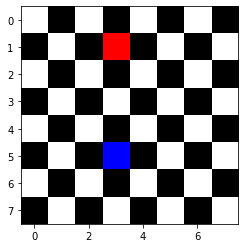

In [5]:
board.add_blue(5,3)
board.render()

___
# User Acceptance Tests
___

In [6]:
print("is red under attack? ", board.is_under_attack())

is red under attack?  True


In [7]:
test_board = ChessBoard()
test_board.add_red(3, 5)
test_board.add_blue(3, 1)
assert test_board.is_under_attack() == True
print("##### horizantal attack test passed ######")

##### horizantal attack test passed ######


In [8]:
test_board = ChessBoard()
test_board.add_red(3, 5)
test_board.add_blue(4, 5)
assert test_board.is_under_attack() == True
print("##### vertical attack test passed ######")

##### vertical attack test passed ######


In [9]:
test_board = ChessBoard()
test_board.add_red(3, 5)
test_board.add_blue(1, 7)
assert test_board.is_under_attack() == True
print("##### diagonal attack test passed ######")

##### diagonal attack test passed ######


In [10]:
test_board = ChessBoard()
test_board.add_red(3, 5)
test_board.add_blue(0, 0)
assert test_board.is_under_attack() == False
print("##### no attack test passed ######")

##### no attack test passed ######
